# Defining the Problem — Machine Learning

How do we make machine learn to do something without explicitely programming it to do that thing?

**Example tasks:**

- Identify if image contains a cat
- Classify handwritten characters
- Generate music
- Play go
- Translation
- Write an essay (not for submission of course)
- ...

We could programme a computer to do these thigns, but it gets harder the less we know how to write such programme. (Imagine someone asking you to handcraft a translator)

**Consider this trivial task:**

We have four-pixel images, and we want to classify them as 1, 7, or L.

Left to right: 7, L, 1, 1

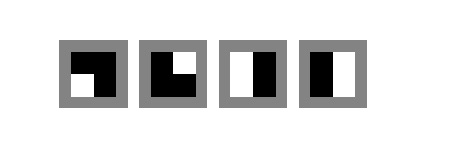

**Okay, maybe you wrote a bunch of if else statements and got something to work**

**What if...** new language with other ways of writing 1, 7, L—

Left to right: 7, L, 1, 1


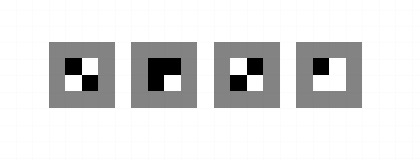

...That just broke our programme

**Ideas:**

- Decision tree?
- Neural network!

# Overview of Neural Network

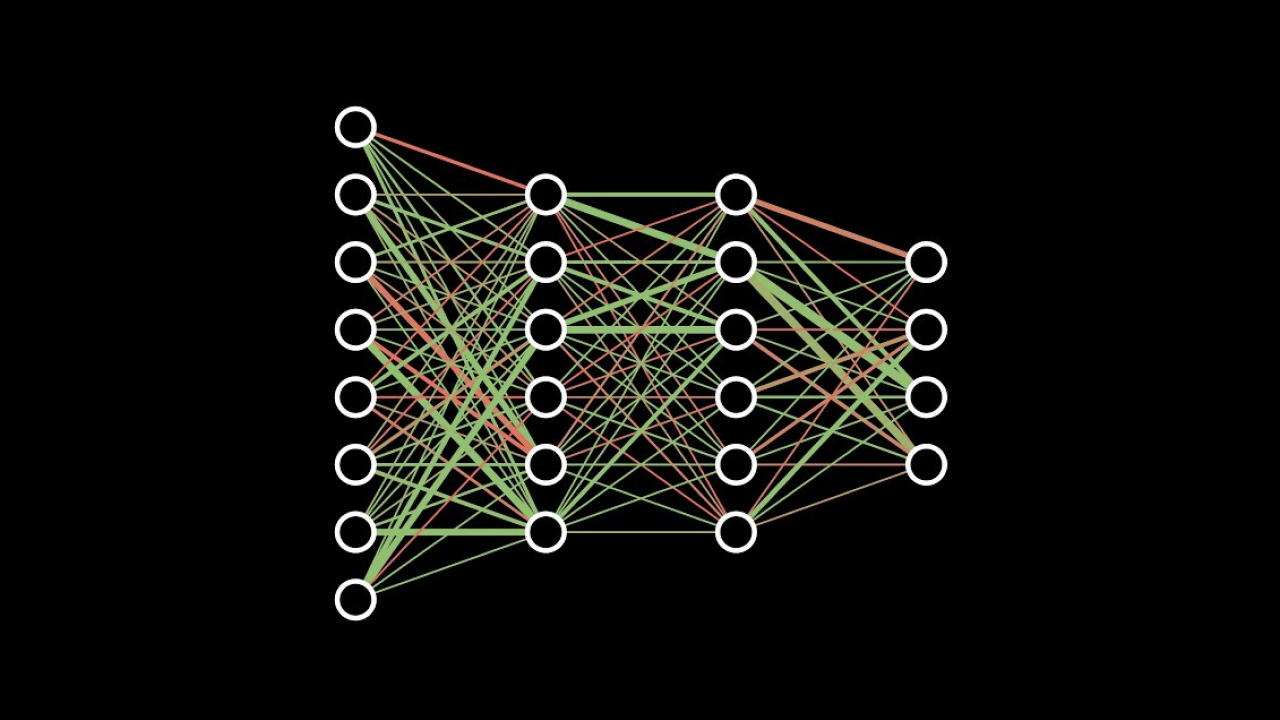

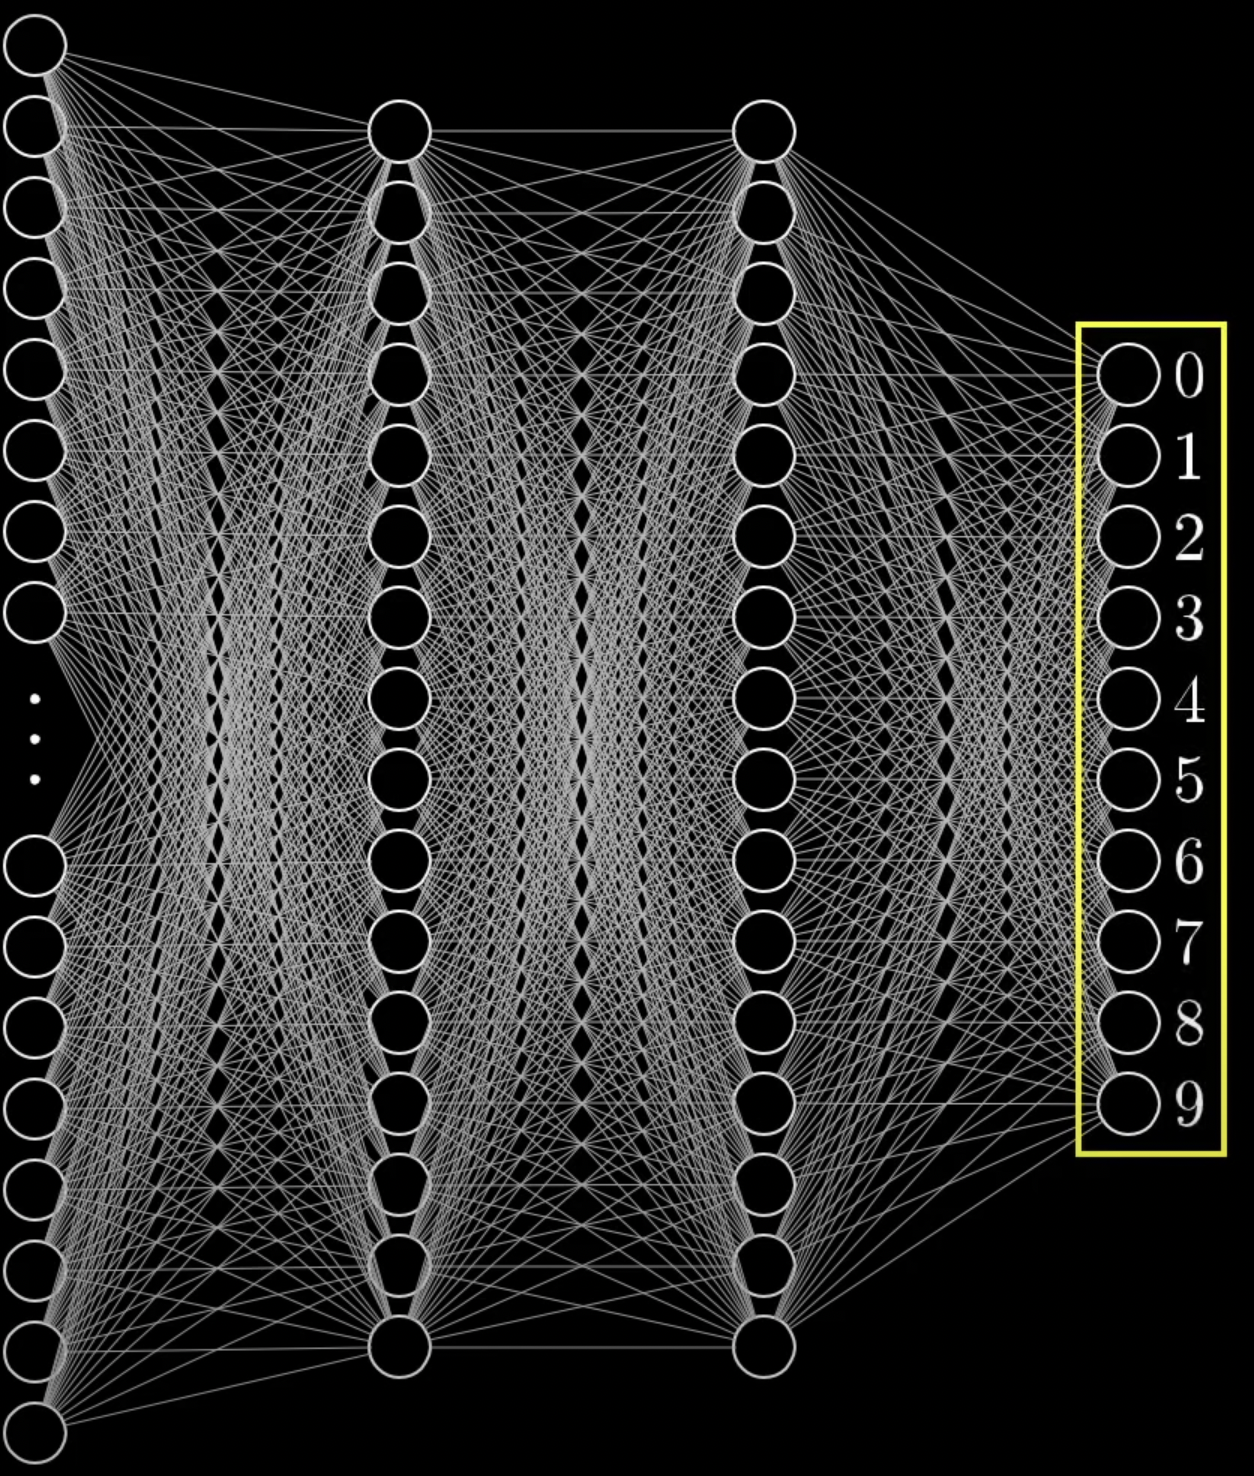

*   Intuition for understanding neural network: it resembles how neurons in our brain are connected
*   Input: some representations of our data
*   Output: some predictions based on the input data

**Question to ask:**
-  How can we communicate our goal with the machine?
-  How does these neural nodes or layers transmit information from one to the other?
-  How does it make predictions and adjust its predictions?



Consider the image below. How do we represent an image so that machine can understand it?

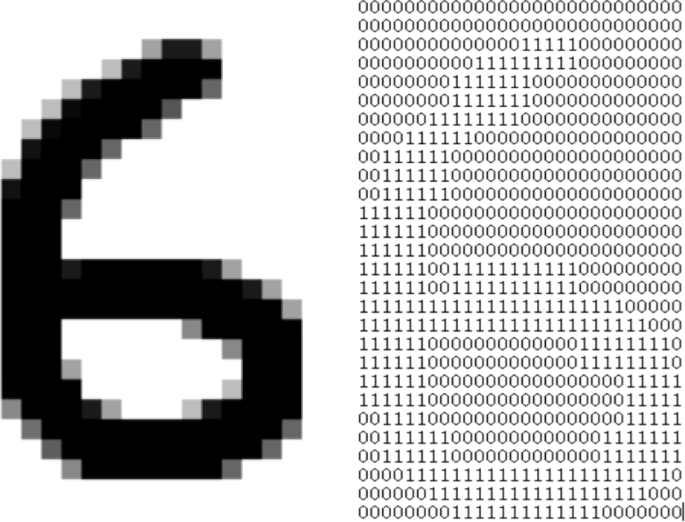

We can represent this 6 as some **vector/matrix** consisted of 0 and 1.

What if my picture has shadows? 

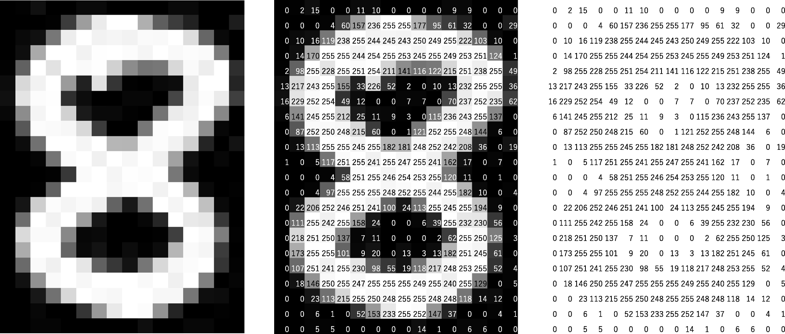

We can then represent this 8 by some **matrix/vector** with the rgb values at each pixel


---

How can we know which output it generates?

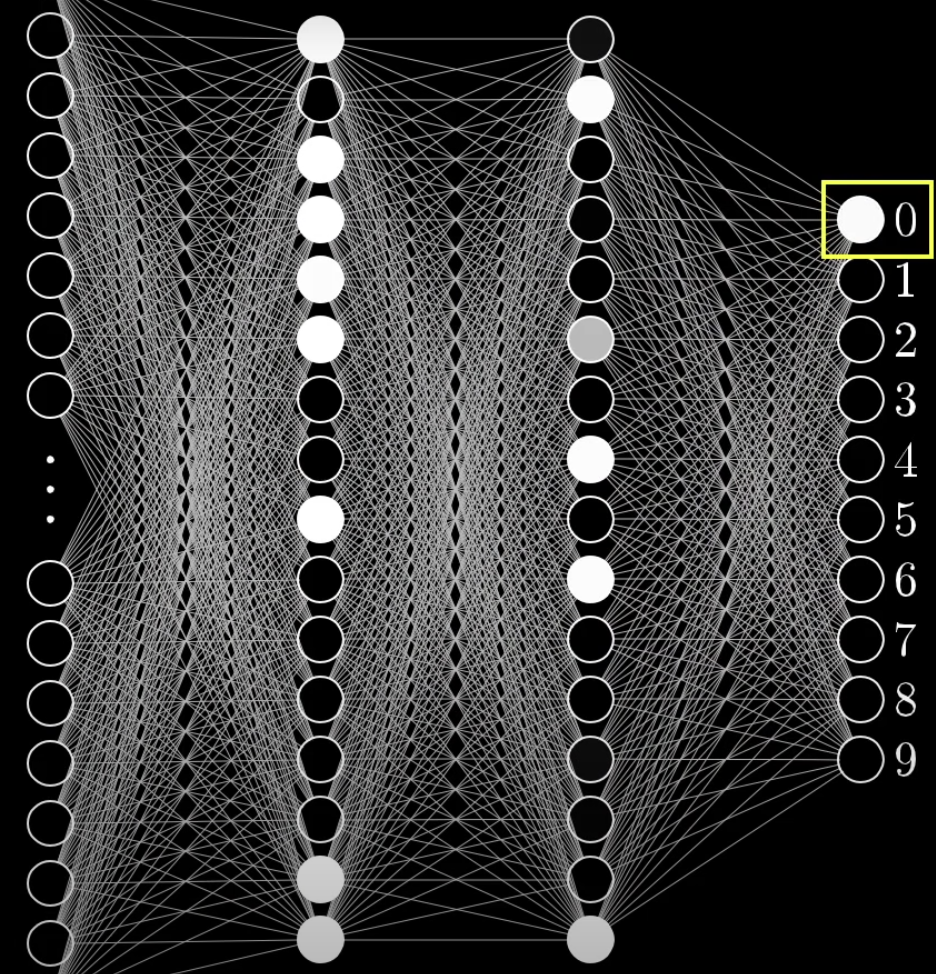

One common way is to use probability. The output with the highest probabilities is what our neural network thinks the input is.  

**Key takeaways**
*  In our simple neural network, we *input* some **vector** representations of our data to the model, or our neural network, and ask it to do its magic and *output* some **predictions** about what the input is.

# Basic Architecture of a Neural Network

**Forward Propogation:**

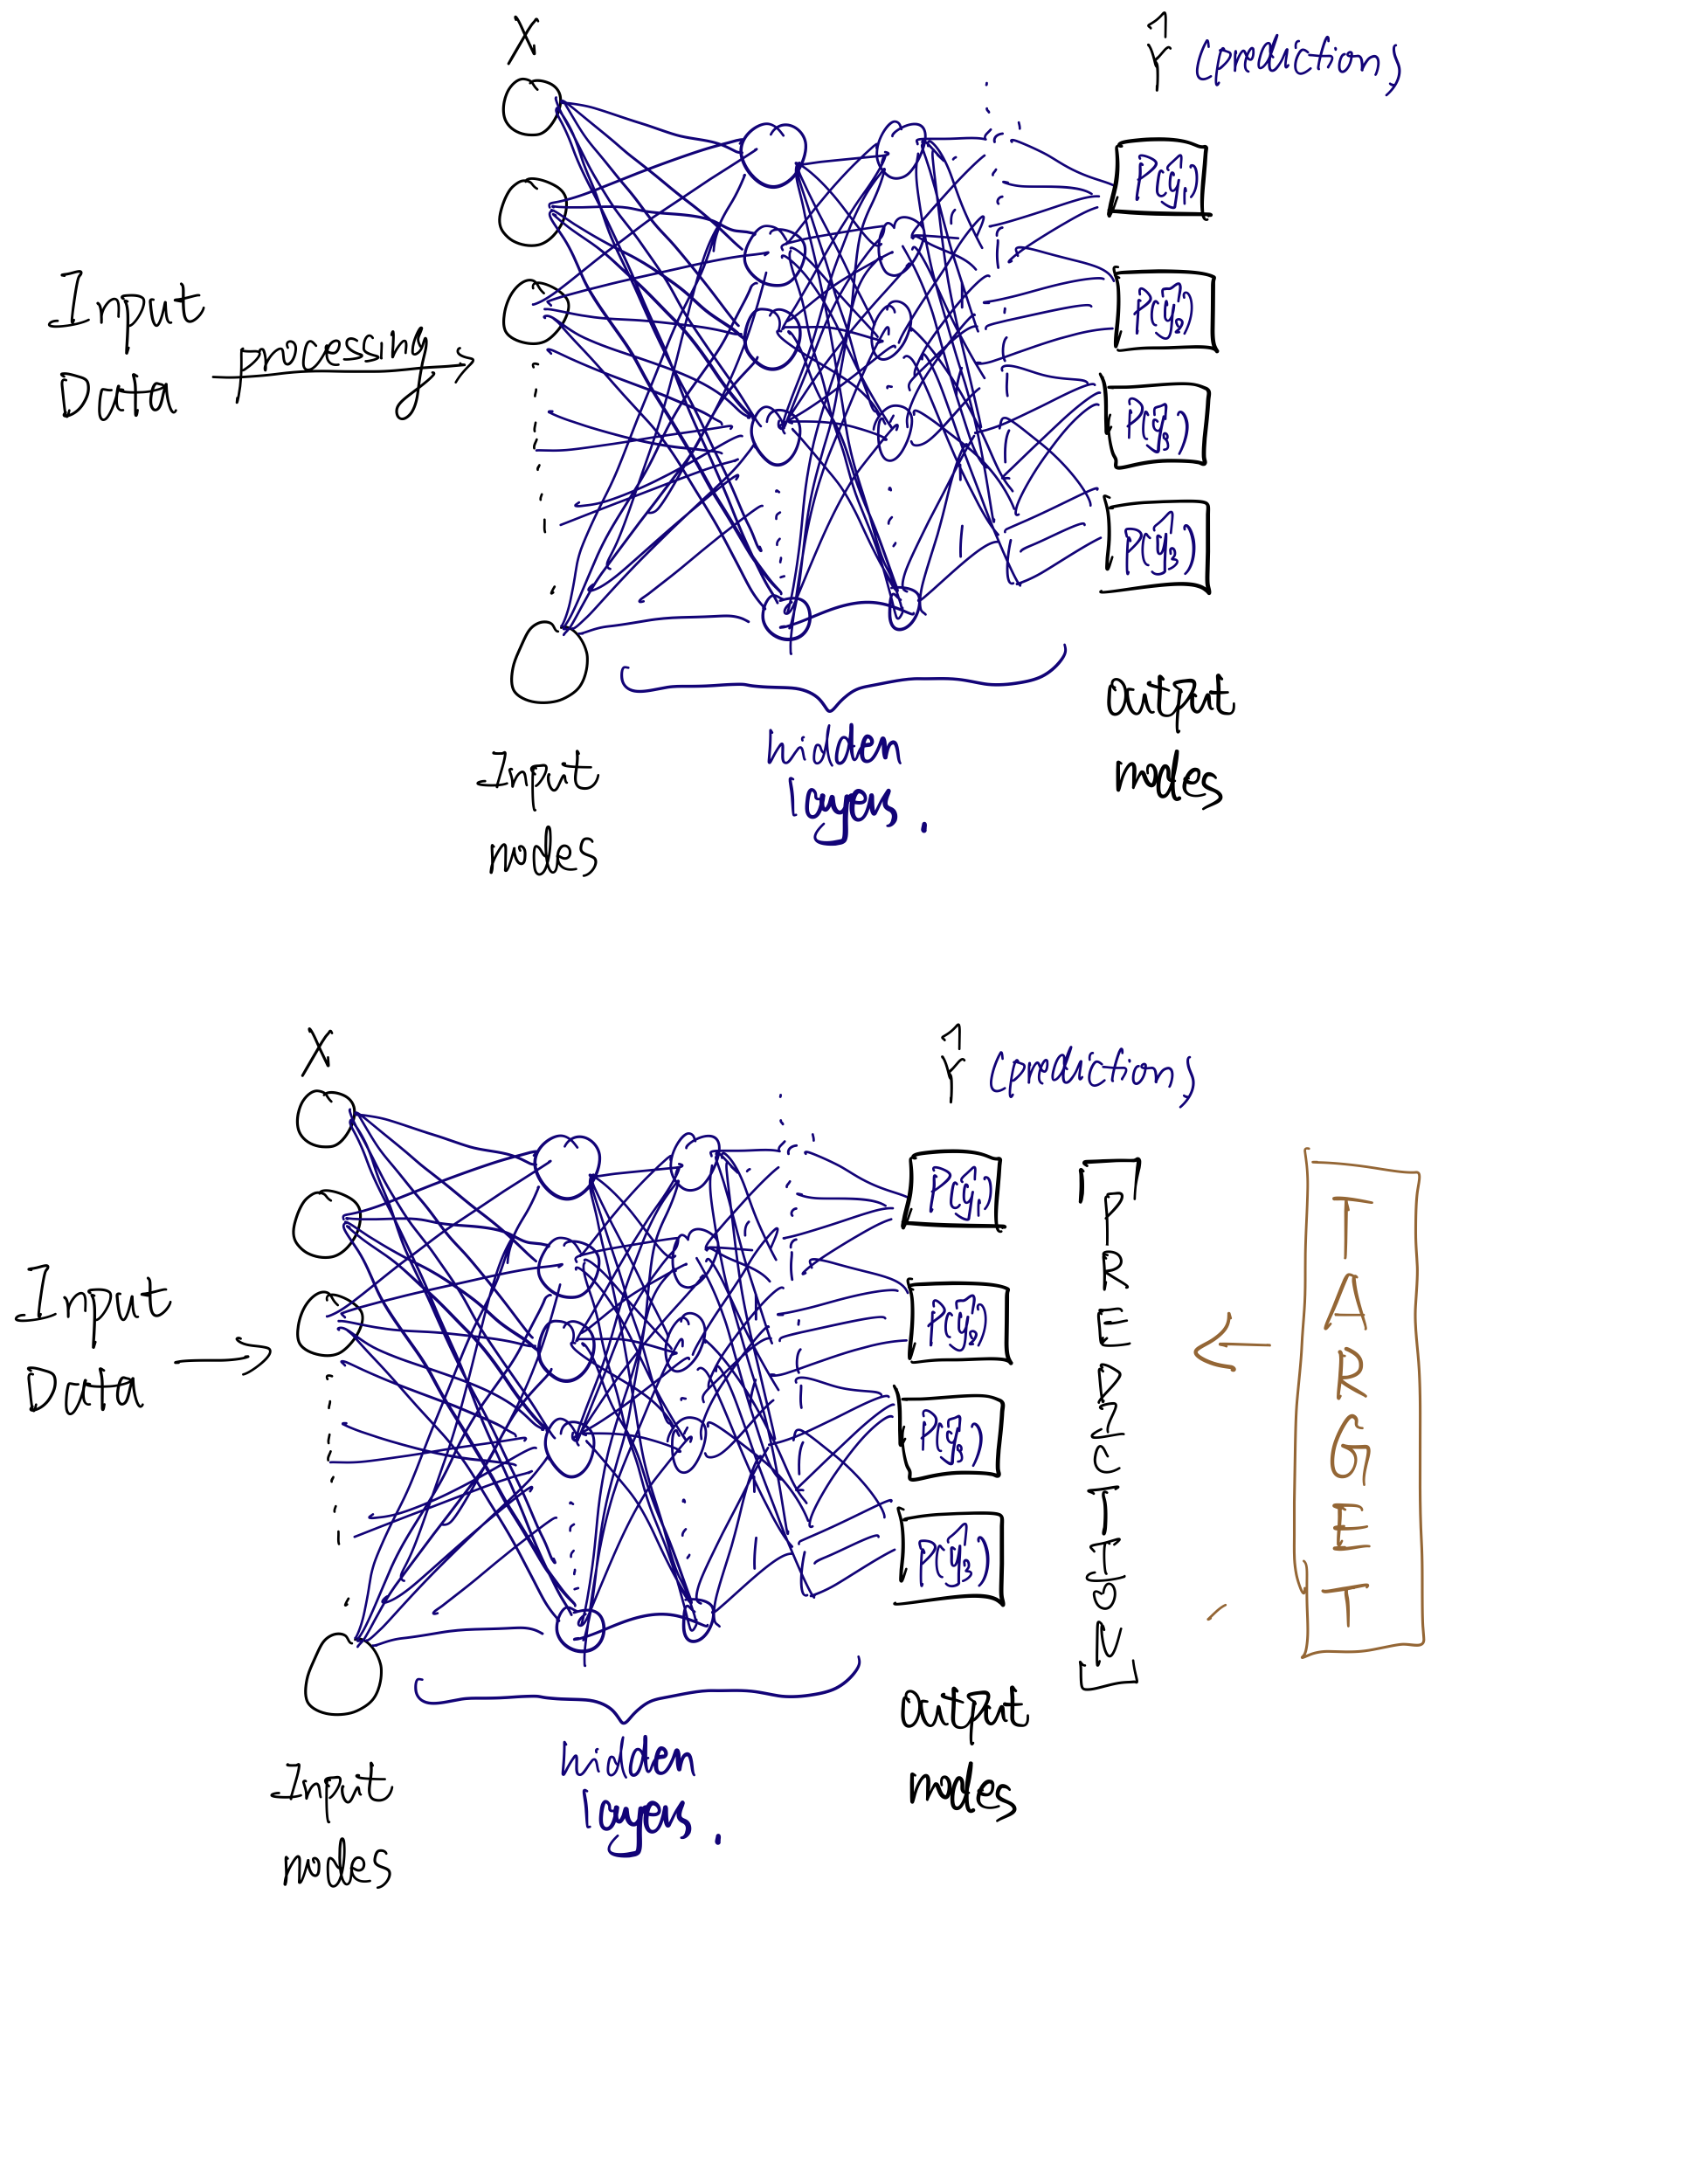

**Calculating Loss & Propagate backward**

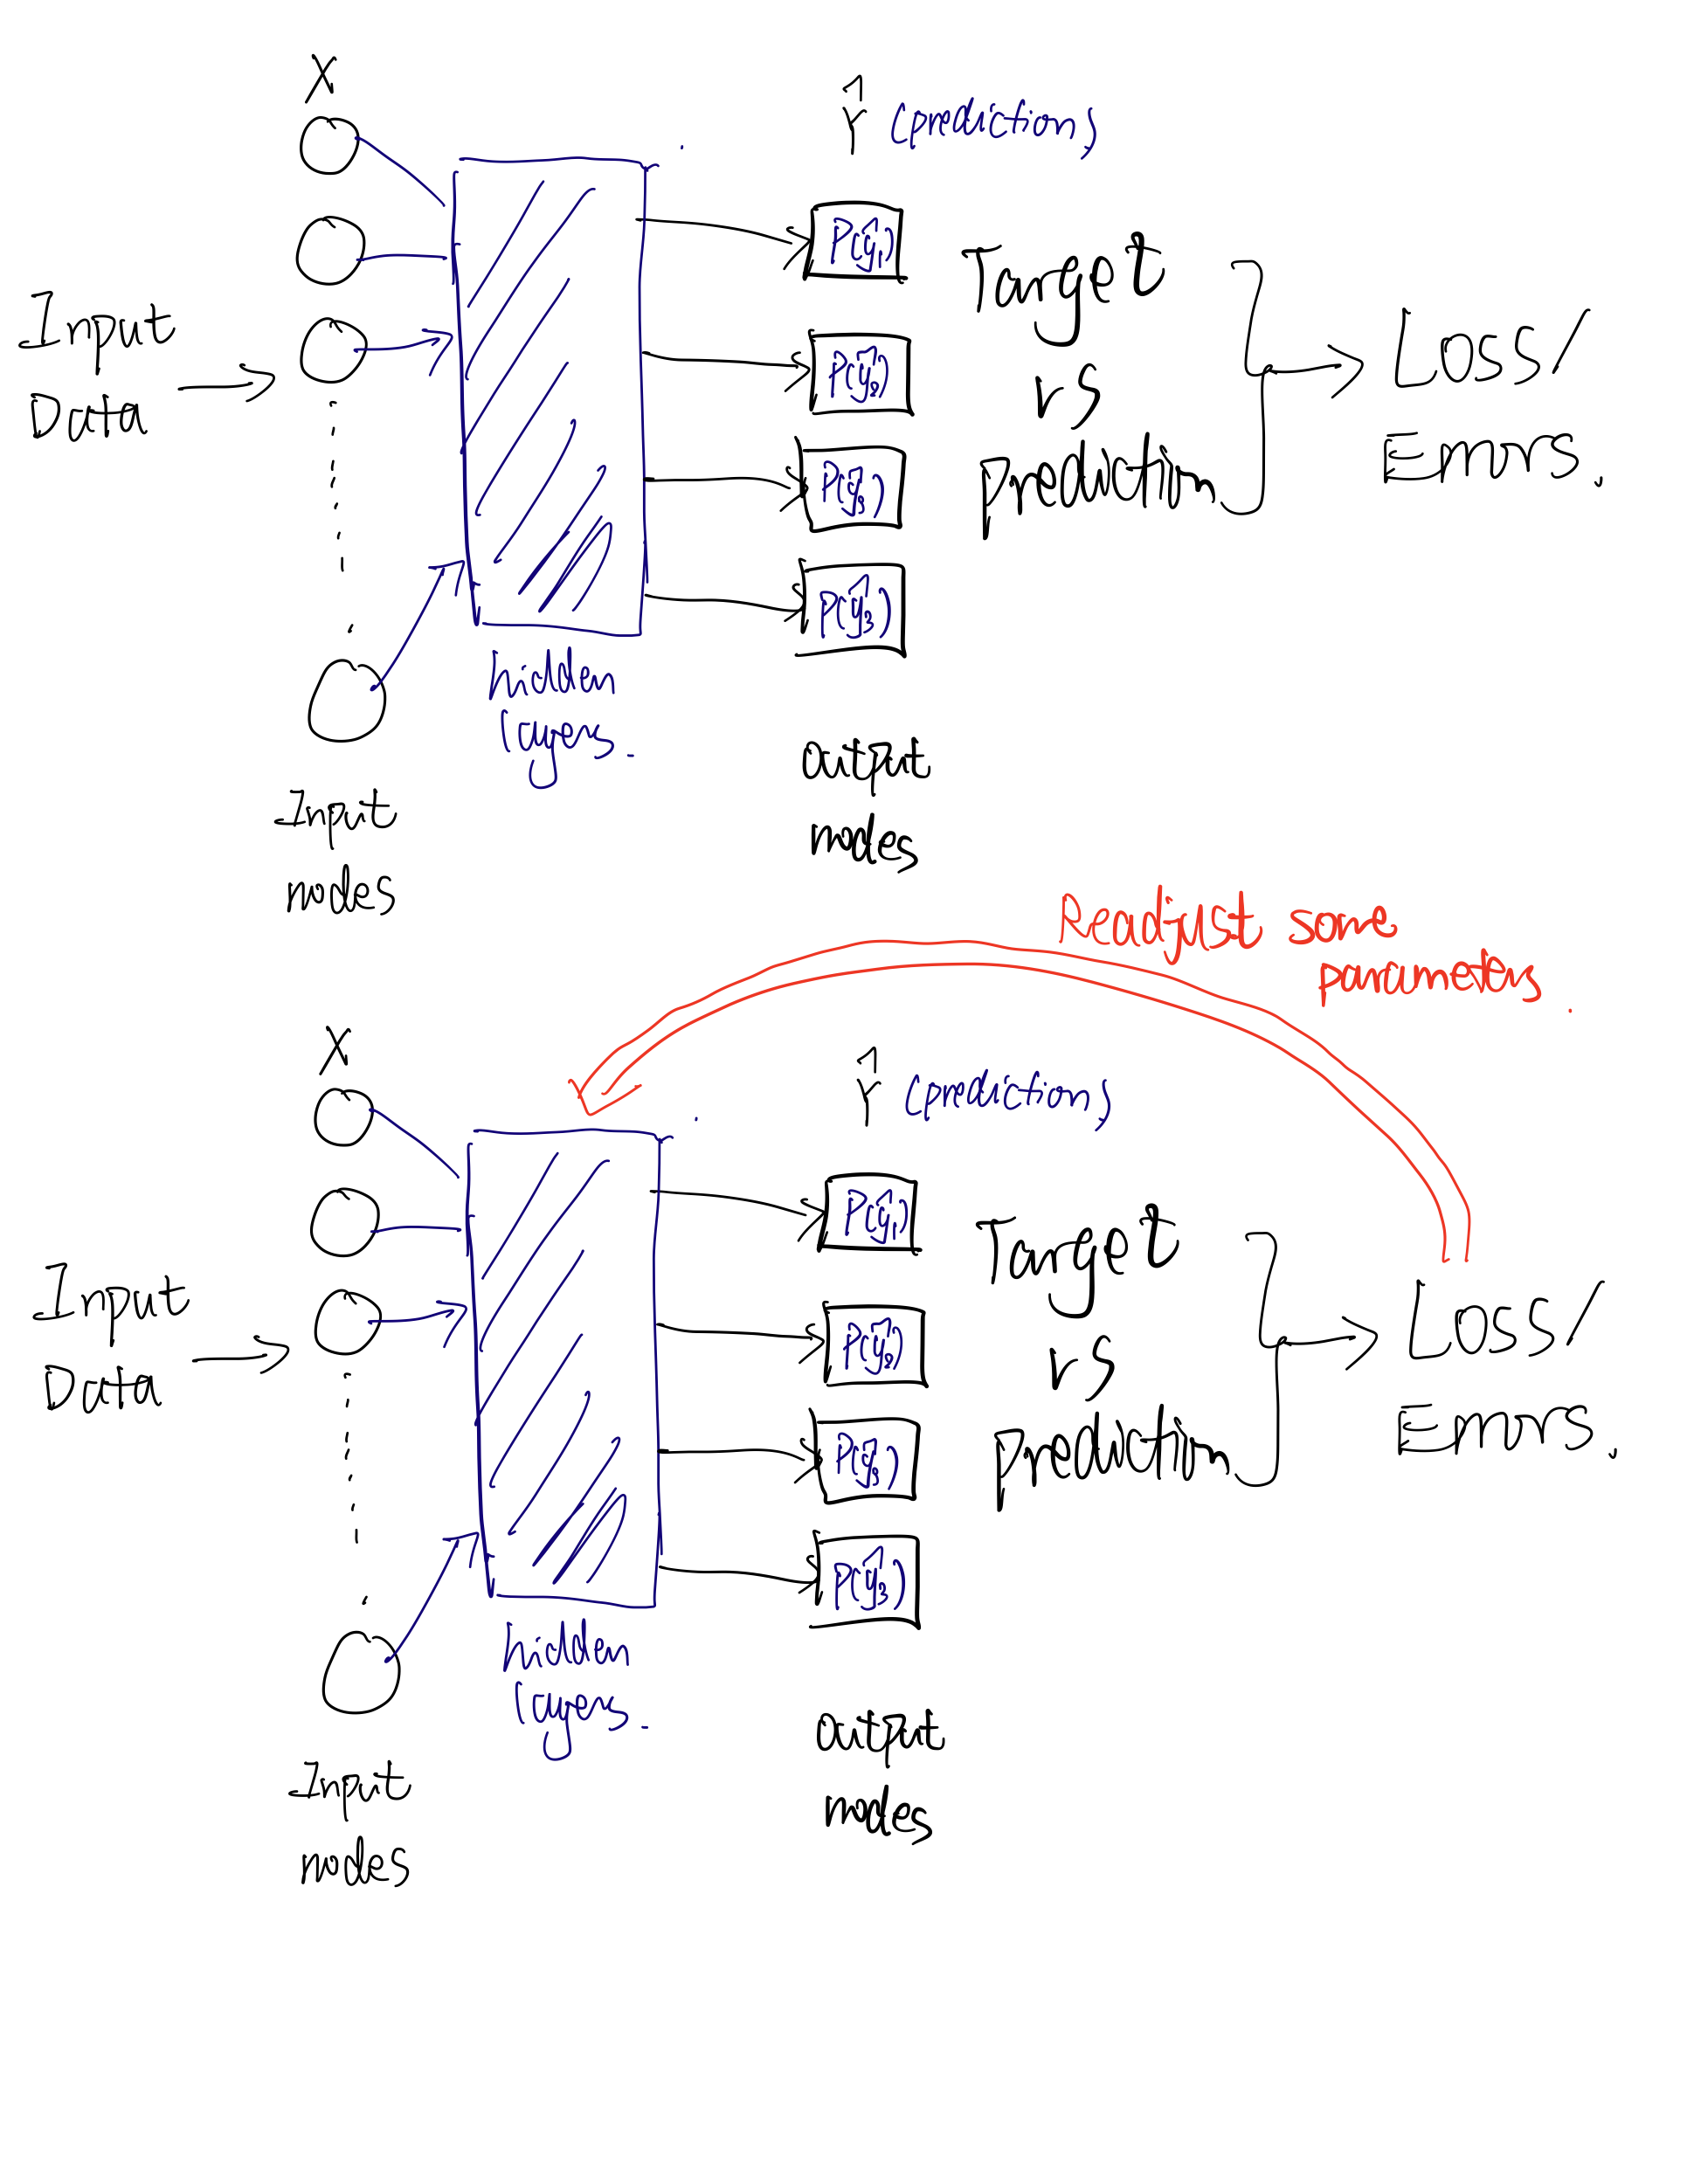

**Key Takeaway**

After we do adjust the model, we start from the left again.

Repeating the process described above for some large number of times,  our model will be able to predict the results with more accuracy.

**Terminology**
*   Forward Propagation: the process of going from input and prediction. 
During forward propagation, we do some transformations/calculation with our input vectors. 
*   Loss: the quantified difference between our predictions and the target. 
*   Backward Propagation: the process of re-calculating and updating the parameters in the model

## Building the Model
---
Structure
*   **Propagation**
*   **Optimization**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py  # Library to load dataset for our cats

In [4]:
# This just downloads the dataset we're using
!wget https://github.com/rvarun7777/Deep_Learning/raw/master/Neural%20Networks%20and%20Deep%20Learning/Week%202/Logistic%20Regression%20as%20a%20Neural%20Network/datasets/test_catvnoncat.h5
!wget https://github.com/rvarun7777/Deep_Learning/raw/master/Neural%20Networks%20and%20Deep%20Learning/Week%202/Logistic%20Regression%20as%20a%20Neural%20Network/datasets/train_catvnoncat.h5

--2023-04-02 20:00:42--  https://github.com/rvarun7777/Deep_Learning/raw/master/Neural%20Networks%20and%20Deep%20Learning/Week%202/Logistic%20Regression%20as%20a%20Neural%20Network/datasets/test_catvnoncat.h5
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rvarun7777/Deep_Learning/master/Neural%20Networks%20and%20Deep%20Learning/Week%202/Logistic%20Regression%20as%20a%20Neural%20Network/datasets/test_catvnoncat.h5 [following]
--2023-04-02 20:00:42--  https://raw.githubusercontent.com/rvarun7777/Deep_Learning/master/Neural%20Networks%20and%20Deep%20Learning/Week%202/Logistic%20Regression%20as%20a%20Neural%20Network/datasets/test_catvnoncat.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent

In [5]:
# Load dataset: Numpy version

device = "cpu"

def load_dataset_np():
    train_dataset = h5py.File('train_catvnoncat.h5','r')
    #
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])
    
    test_dataset = h5py.File("test_catvnoncat.h5",'r')
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])
    
    classes = np.array(test_dataset["list_classes"][:])
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset_np()

# flatten train set and test set
train_set_x = train_set_x_orig.reshape(-1,train_set_x_orig.shape[0])  
test_set_x = test_set_x_orig.reshape(-1,test_set_x_orig.shape[0])

# standardize
train_set_x = (train_set_x/255)
test_set_x = test_set_x/255

y = [1], it's a 'cat' picture.


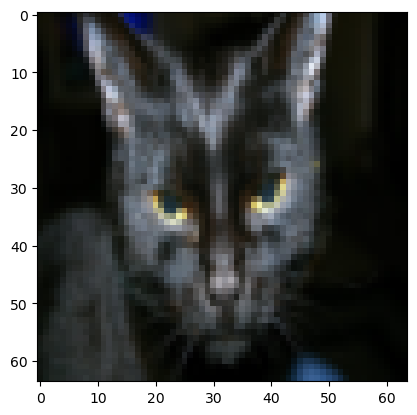

In [6]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

# **Propagatioin**
---
At each layer during forward propogation 

$X_{m*n}$: Input where m = number of inputs, n = input size.

$Y_{m*1}$: Target

$W_{k*n}$ and $b$: weights where n = input size, k = output layer size

---

**Step 1: Give a prediction**

Prediction: $Z = (W)^T \cdot X + b = (y_1',y_2',...,y_n')$ (Matrix multiplication)

Activation: $A = σ(Z) = (a_1,a_2,...,a_n)$  (We chose sigmoid act. function)

where $n=$ input size. The dimension of A = dimemsion of X. 

-   Linear Combination!

**Step 2: Calculates the loss**

$J = \sum_{1}^m [y^{i} * \log(a^{i}) + (1-y^{i})\log(1-a^{i})]$

Calculate the difference between the activations and the target through what's called the loss function.

**Step 3: Update the gradients**

Use the Loss to update gradients, which in the optimazation step later on, will be used to update weights

Difference $= [(a^1-y^1), ...., (a^n - y^n)] = A - Y$

$\frac{dJ}{dW} = \frac1m * \sum_{i=1}^m X*(A-Y)^T$

$\frac{dJ}{db} = \frac1m * \sum_{i=1}^m \frac{dJ}{db^i} = \frac1m * \sum_{i=1}^m (a^i - y^i)$
<!-- $dw = \frac1m \sum_{i=1}^m dw^i = \frac1m(x^1*dZ^1 + ... + x^n*dZ^n) = \frac1m * X *(A-Y).T$ -->

# Gradients Descent
- An optimiazation algorithm that allows us to get closer to the optimal prediction.

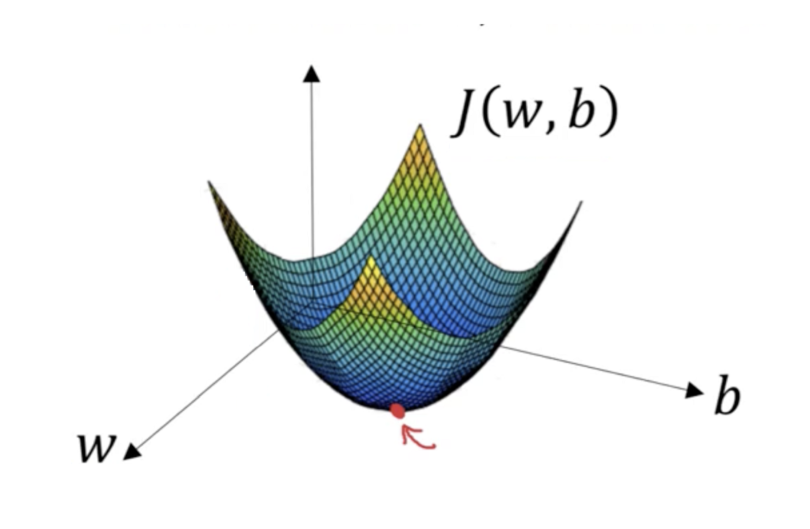

- Gradient is the derivative of Loss with respect to weights, i.e. how does our loss changes according the change in weights. 

$\frac{dJ}{dw} = \frac{1}{m} * X(A-Y)$

$\frac{dJ}{db} = \frac{1}{m} * \sum_{1}^m (a^{i} - y^{i})$

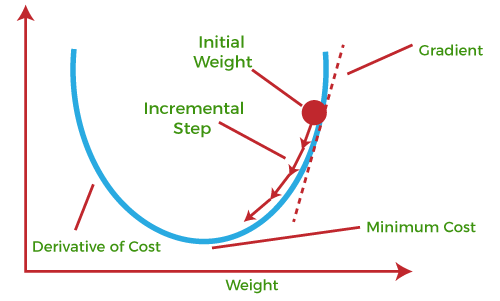

---
**Gradient descent allows us to lower cost through iterations of training.** 

**Two common types of Gradient Descent**
1. Stochastic Gradient Descent (SGD)
2. Mini-batch gradient descent (batch)

# Let's Implement Forward propagation

-  Load data
-  
```
def propagate(w,b,X,Y)
```



In [7]:
# FORWARD PROPAGATION (FROM X TO COST)
def propagate(w, b, X, Y):
    # X: n*m
    # Y: k'*m
    # W: n * output_layer_size
    # b: constant/number
    m = X.shape[1]                # m = number of inputs
    z = np.dot(w.T, X) + b        # Make Prediction
    A = 1/(1 + np.exp(-z))        # Activation to add non-linearity
    cost = -1/m * np.sum(Y * np.log(A) + (1-Y)*np.log(1-A))   # cost function

    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = 1/m * np.dot(X,(A-Y).T)
    db = 1/m * np.sum(A-Y)
    
    cost = np.squeeze(np.array(cost))   # do some dimension work

    # return cost and gradients
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

# **Optimization**

The goal of optimzation is to learn the "best" parameters $W$ and $b$ such that we can minmize the loss function $J$.
```
def optimize(w, b, X, Y, epochs, learning_rate)
```
$W$: initial weights (usually some matrix of zeros or ones)

$b$: initial bias

$X_{n*m}$: inputs

$Y_m$: target/label

$α$: learning rate

Formulas for updating the variables: 

$W = W - α*dw$

$b = b - α*db$


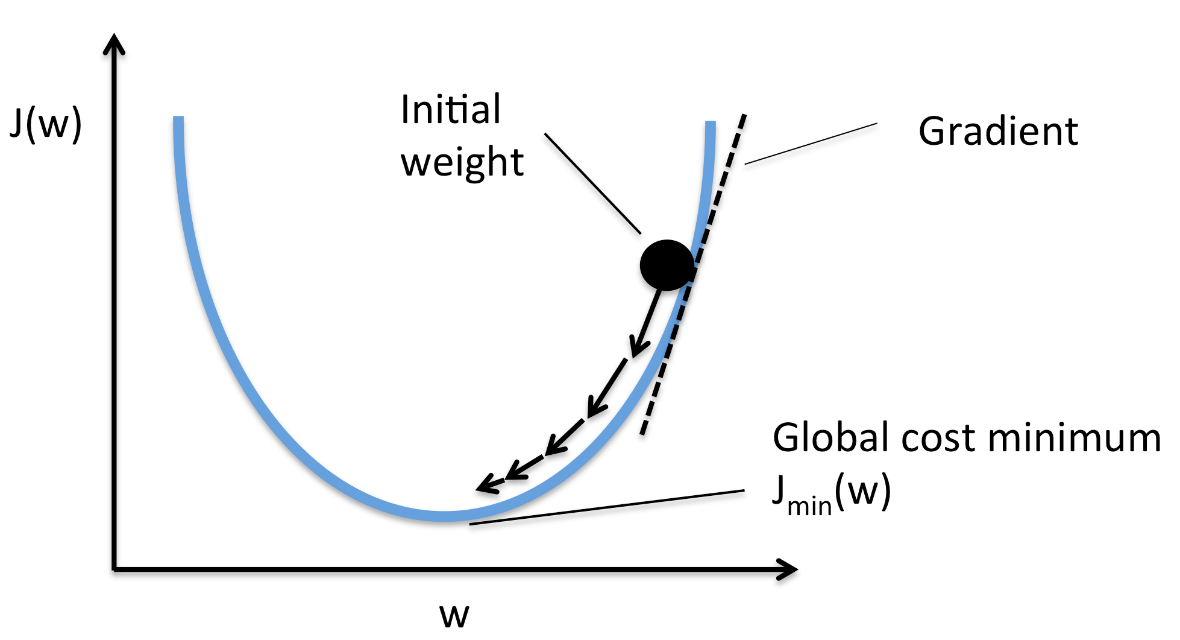

**Learning rate**

The learning rate defines how frequently the model will update its weights. The idea is that we want the model to update the weight at such a frequency that it can reaches its optimal performance.
-   If the learning rate is too small, it might take thousands of years to train a model. 
-   If the learning rate is too high, we are at risk of missing the global minimum(i.e. overfitting)

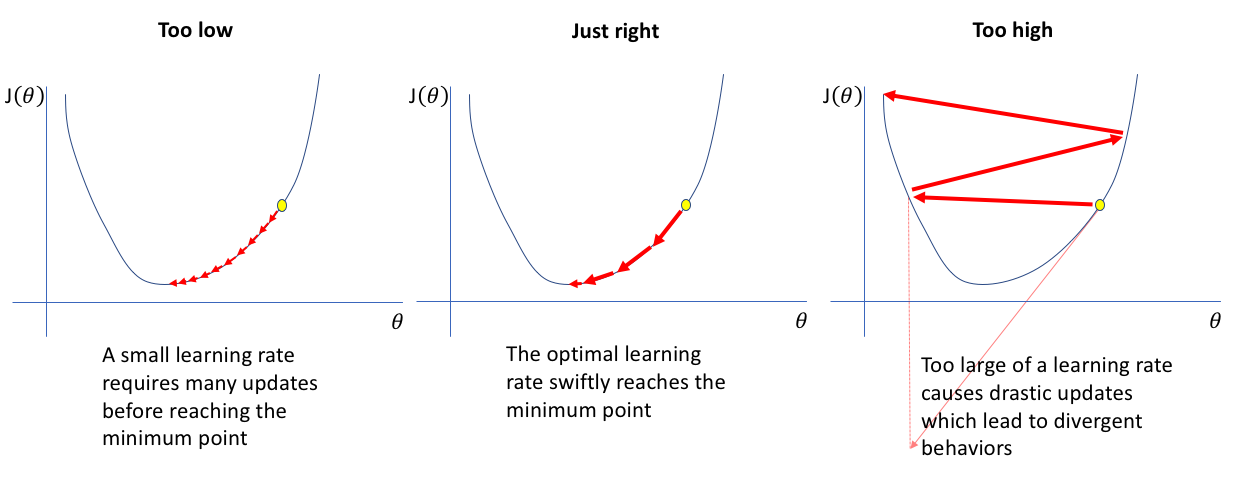

In [8]:
import copy

def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        grads,cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives
        dw = grads["dw"]
        db = grads["db"]
        
        # update parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db
       
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

# Put pieces together
1. Initialize weights
2. Train the model with training dataset(propagation and optimization)
3. Make prediction on the test set

Prediction function: 

if the predicted probability for an test sample is greater than 0.5, it is a cat. Otherwise, the model thinks that it is not a cat.

In [9]:
# Prediciton given test-set

def predict(w, b, X):
    # w,b: weights after training
    # X: test_X_dataset
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    #Make prediction:
    A = 1/(1+ np.exp(-(np.dot(w.T,X)+b)))
    
    for i in range(A.shape[1]):
        if A[0,i]>0.5: 
          Y_prediction[0,i] = 1
        else: 
          Y_prediction[0,i] = 0
    

    return Y_prediction

In [10]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    
    #initialize weights
    w,b = np.zeros((X_train.shape[0],1)),0.0 

    # train model with train data set
    params,grads,costs = optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)
    w,b = params['w'],params['b']
    
    # make prediction
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)
    # YOUR CODE ENDS HERE

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [11]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.709726
Cost after iteration 200: 0.657712
Cost after iteration 300: 0.614611
Cost after iteration 400: 0.578001
Cost after iteration 500: 0.546372
Cost after iteration 600: 0.518331
Cost after iteration 700: 0.492852
Cost after iteration 800: 0.469259
Cost after iteration 900: 0.447139
train accuracy: 84.21052631578948 %
test accuracy: 34.0 %


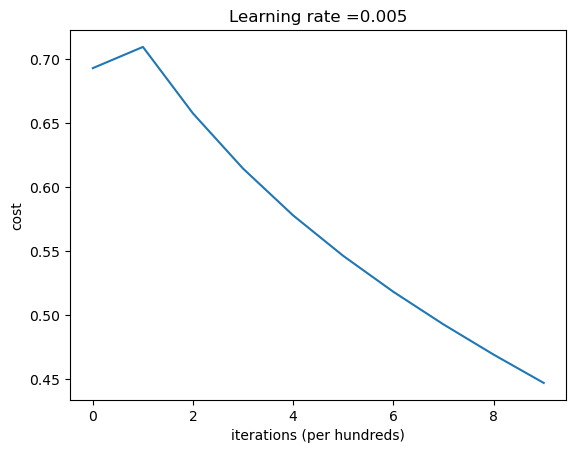

In [12]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

---END of First lecture ---- See you next time~

# Cat Classifier PyTorch Version

In [13]:
# Import several PyTorch libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [14]:
device = "cpu"

def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5','r')
    #
    train_set_x_orig = torch.tensor(train_dataset["train_set_x"][:])
    train_set_y_orig = torch.tensor(train_dataset["train_set_y"][:])
    
    test_dataset = h5py.File("test_catvnoncat.h5",'r')
    test_set_x_orig = torch.tensor(test_dataset["test_set_x"][:])
    test_set_y_orig = torch.tensor(test_dataset["test_set_y"][:])
    
    classes = np.array(test_dataset["list_classes"][:])
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [15]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

# flatten train set and test set
train_set_x = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1)  
test_set_x = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1)

# standardize
train_set_x = (train_set_x/255)
test_set_x = test_set_x/255

print(train_set_y.squeeze().shape)
print(train_set_x.shape)

torch.Size([209])
torch.Size([209, 12288])


In [16]:
# Hyperparameters

# train_set_x.shape == (209,12288)
input_size = train_set_x.shape[1] # size of one image
num_epochs = 3000
learning_rate = .001
hidden1_size = 128
hidden2_size = 64

In [17]:
class CatClassifier(nn.Module):
    def __init__(self,input_size,hidden1_size,hidden2_size):
        super(CatClassifier,self).__init__()
        self.layer1 = nn.Linear(input_size,1)
        self.activate1 = nn.Sigmoid()
        
    def forward(self,inputs):
        output = self.layer1(inputs.float())
        output = self.activate1(output)
        return output

model = CatClassifier(input_size,hidden1_size,hidden2_size)
criterion = nn.BCELoss()
# Note: SGD performs better on image classification task than Adam. 
# SGD, stochastic gradient descent is precisely substrating weights * learning rate from orig. weights
optimizer = optim.SGD([p for p in model.parameters() if p.requires_grad], lr=learning_rate)

In [18]:
losses = []
target = train_set_y.float().squeeze()

for epoch in range(num_epochs):
    #output weights
    outputs = model(train_set_x).squeeze()
    #calculate binary cross entropy loss
    loss = criterion(outputs,target)
    #Clear out gradients from previous epoch
    optimizer.zero_grad()
    # do backward propogation
    loss.backward()
    # using SGD to do gradient descent
    optimizer.step()
    losses.append(loss.item())

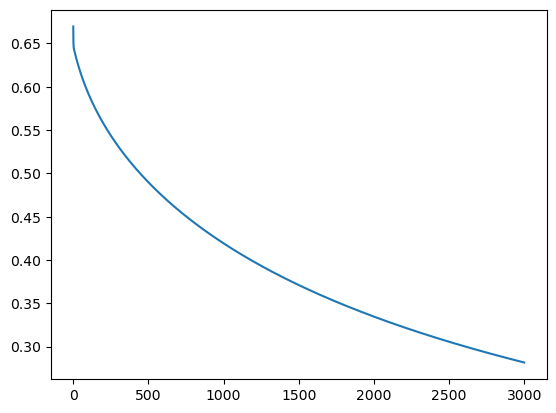

In [19]:
plt.plot(losses)

In [20]:
# test size: 50 * 12288
labels = test_set_y.squeeze()
outputs = model(test_set_x).squeeze()
predictions = torch.maximum(outputs,torch.ones(outputs.shape))
n_correct = (predictions==labels).sum().item()
accuracy = n_correct/50
print(f'accuracy: {(accuracy*100):.3}%')

accuracy: 66.0%


# Some fun things you can do

- play around with https://playground.tensorflow.org
- Watch the [neural network series by 3b1b](https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) 
- Explore this an [interactive visualization](https://adamharley.com/nn_vis/mlp/3d.html) of what we are trying to make

# An Introduction to Pytorch

In [21]:
from matplotlib import pyplot as plt
import torch # you can't pytorch without importing it
torch.manual_seed(0) # this is just to keep random things consistent for demo

## Tensor Operations

One thing you will be working with a lot is tensor. A tensor can be thought of as a high-dimensional matrix (which itself could be though of as a higher dimensional vector).

Let's try making some vectors and matrices first.



In [22]:
v = torch.tensor([1,2]) # you can create a vector this way
v, v.shape

(tensor([1, 2]), torch.Size([2]))

In [23]:
A = torch.tensor([[2, 1], [3, 4]]) # now let's create a square matrix
B = torch.tensor([[-1, 4], [2, 0]]) # one more
print(A)
print(B)

tensor([[2, 1],
        [3, 4]])
tensor([[-1,  4],
        [ 2,  0]])


And we can do matrix operations on them

In [24]:
torch.matmul(A, v) # this is a matrix-vector multiplication!

tensor([ 4, 11])

In [25]:
torch.matmul(A, B)

tensor([[ 0,  8],
        [ 5, 12]])

In [26]:
A.T # this is how you take a transpose

tensor([[2, 3],
        [1, 4]])

In [27]:
torch.det(A.float()) # even take the determinant (doesn't work for int matrix, apparently)

tensor(5.)

A very powerful thing torch lets you do is tensor calculus. Let's create a random tensor with gradient enabled.

In [28]:
x = torch.randn((2,3,4), requires_grad = True) # track gradients
print(x.shape)
print(x)

torch.Size([2, 3, 4])
tensor([[[-1.1258, -1.1524, -0.2506, -0.4339],
         [ 0.8487,  0.6920, -0.3160, -2.1152],
         [ 0.4681, -0.1577,  1.4437,  0.2660]],

        [[ 0.1665,  0.8744, -0.1435, -0.1116],
         [ 0.9318,  1.2590,  2.0050,  0.0537],
         [ 0.6181, -0.4128, -0.8411, -2.3160]]], requires_grad=True)


Now, if we do a bunch of calculations based on the tensor... Notice we get a single tensor that's the mean of w after all these business

In [29]:
y = x + 3.0
z = y*y
w = z.mean()
w

tensor(10.1019, grad_fn=<MeanBackward0>)

Watch the magic as we call `w.backward` — it calculates the partial derivative of values in the tensors that lead to the value of `w` and eventually goes back to `x`, which we said `requires_grad=True`

In [30]:
w.backward()
print(x.grad) # each element is ∂w/∂x

tensor([[[0.1562, 0.1540, 0.2291, 0.2138],
         [0.3207, 0.3077, 0.2237, 0.0737],
         [0.2890, 0.2369, 0.3703, 0.2722]],

        [[0.2639, 0.3229, 0.2380, 0.2407],
         [0.3277, 0.3549, 0.4171, 0.2545],
         [0.3015, 0.2156, 0.1799, 0.0570]]])


Another example that shows the partial derivative relation more clearly

In [31]:
x = torch.tensor([2.0, 6.0], requires_grad = True) # track gradients
y = x**3
z = y.sum()
z.backward()
x.grad

tensor([ 12., 108.])

There are ways to stop torch from keeping track of gradient when you don't want it to. Examples are as follows, but we won't go into detail right now

```python
x.requires_grad_(False)
y = x.detach() + 2
with torch.no_grad():
  y = x.detach() + 2
```

## Some linear regression — optimizing one variable

In [32]:
# we are trying to fit f(x) = 3 * x
X = torch.tensor([1, 2, 3, 4, 5, 6], dtype=torch.float32)
Y = torch.tensor([3.07, 5.93, 9.04, 11.97, 15.12, 17.89], dtype=torch.float32)


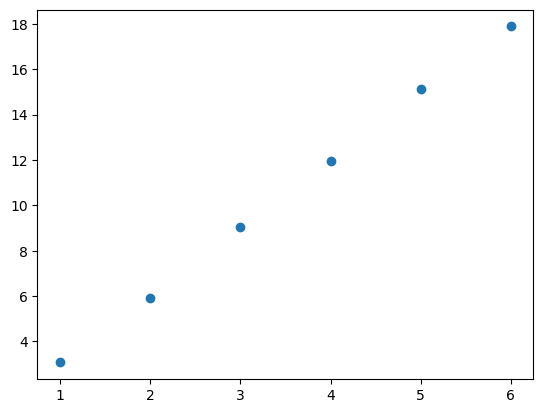

In [33]:
plt.scatter(X, Y) # looks linear enough!

In [34]:
# we try to learn this c in f(x) = c * x
c = torch.tensor(0.0, dtype=torch.float32, requires_grad=True) 

def predict(x):
  return c * x

# Mean squared error
def calc_loss(y, y_hat):
  return ((y_hat - y)**2).mean()

# training params
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    # do prediction
    y_hat = predict(X)

    # calculate loss
    loss = calc_loss(Y, y_hat)

    # calculate partial derivatives
    loss.backward()

    # optimize using those partial derivatives
    with torch.no_grad():
        c -= learning_rate * c.grad
    
    # clear gradient (for next round)
    c.grad.zero_()

    if epoch % 10 == 0:
        print(f'<epoch {epoch+1}> c = {c.item():.4f}, loss = {loss.item():.4f}, f(5) prediction = {predict(5).item():.3f}')

<epoch 1> c = 0.9096, loss = 136.3765, f(5) prediction = 4.548
<epoch 11> c = 2.9423, loss = 0.1053, f(5) prediction = 14.712
<epoch 21> c = 2.9971, loss = 0.0065, f(5) prediction = 14.985
<epoch 31> c = 2.9985, loss = 0.0064, f(5) prediction = 14.993
<epoch 41> c = 2.9986, loss = 0.0064, f(5) prediction = 14.993
<epoch 51> c = 2.9986, loss = 0.0064, f(5) prediction = 14.993
<epoch 61> c = 2.9986, loss = 0.0064, f(5) prediction = 14.993
<epoch 71> c = 2.9986, loss = 0.0064, f(5) prediction = 14.993
<epoch 81> c = 2.9986, loss = 0.0064, f(5) prediction = 14.993
<epoch 91> c = 2.9986, loss = 0.0064, f(5) prediction = 14.993


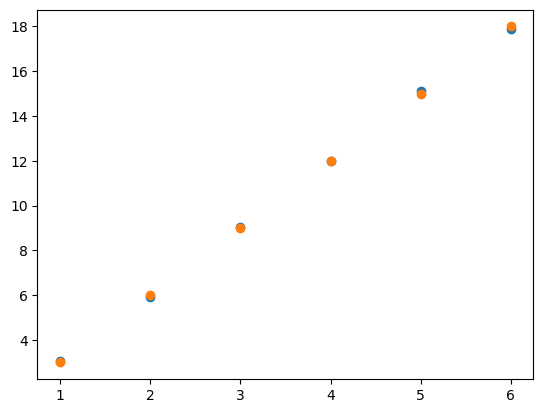

In [35]:
# examine the predictions
plt.scatter(X, Y) # original
with torch.no_grad():
    Y_hat = [predict(x) for x in X]
plt.scatter(X, Y_hat) 

# MNIST Digit Classifier
—The Hello World of neural networks (...?)

In [36]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
from tqdm.notebook import tqdm

In [37]:
# this lets us use GPU, if one is available
if torch.cuda.is_available():
    device = torch.device("cuda:0")  
    print("Running on gpu")
# this is Apple's GPU, if there exists one
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Running on mps")
# Otherwise CPU, which will be much slower
else:
    device = torch.device("cpu")
    print("Running on cpu")

Running on mps


In [38]:
# constants. don't touch or things may break
input_size = 784 # (28 * 28) images
num_classes = 10

# hyperparams. You can play around with these
hidden1_size = 256
hidden2_size = 64
num_epochs = 10
batch_size = 128
learning_rate = .0001

In [39]:
train_dataset = torchvision.datasets.MNIST(root = './data', train = True, transform = transforms.ToTensor(), download = True)
test_dataset = torchvision.datasets.MNIST(root = './data', train = False, transform = transforms.ToTensor(), download = True)

In [40]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

torch.Size([128, 1, 28, 28]) torch.Size([128])


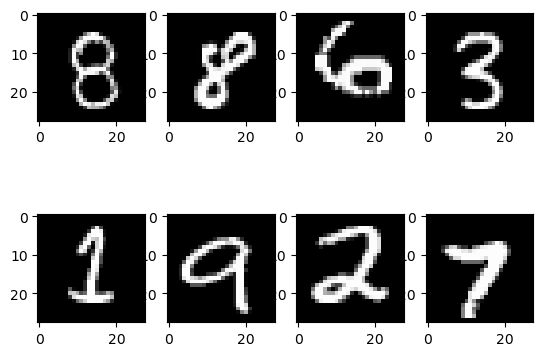

In [41]:
samples, labels = next(iter(train_loader))
print(samples.shape, labels.shape)

for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [42]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes, hidden1_size, hidden2_size):
        super(NeuralNet, self).__init__()
        
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden1_size),
            nn.ReLU(),
            nn.Linear(hidden1_size, hidden2_size),
            nn.ReLU(),
            nn.Linear(hidden2_size, num_classes),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.network(x)

In [43]:
model = NeuralNet(input_size, num_classes, hidden1_size, hidden2_size).to(device)

In [44]:
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(model.parameters(), lr = learning_rate)
losses = []

In [45]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = loss_fn(outputs, labels)

        optimiser.zero_grad()
        loss.backward()
        optimiser.step()

        if (i + 1) % 100 == 0:
            print (f'epoch = [{epoch+1}/{num_epochs}], step = [{i+1}/{n_total_steps}], loss = {loss.item()}')
    losses.append(loss.item())

epoch = [1/10], step = [100/469], loss = 2.124385118484497
epoch = [1/10], step = [200/469], loss = 1.855729579925537
epoch = [1/10], step = [300/469], loss = 1.757800817489624
epoch = [1/10], step = [400/469], loss = 1.6989238262176514
epoch = [2/10], step = [100/469], loss = 1.646148920059204
epoch = [2/10], step = [200/469], loss = 1.654342532157898
epoch = [2/10], step = [300/469], loss = 1.5765453577041626
epoch = [2/10], step = [400/469], loss = 1.6063997745513916
epoch = [3/10], step = [100/469], loss = 1.6199983358383179
epoch = [3/10], step = [200/469], loss = 1.5985586643218994
epoch = [3/10], step = [300/469], loss = 1.5651957988739014
epoch = [3/10], step = [400/469], loss = 1.5614111423492432
epoch = [4/10], step = [100/469], loss = 1.5597553253173828
epoch = [4/10], step = [200/469], loss = 1.5576527118682861
epoch = [4/10], step = [300/469], loss = 1.5752973556518555
epoch = [4/10], step = [400/469], loss = 1.5659799575805664
epoch = [5/10], step = [100/469], loss = 1.56

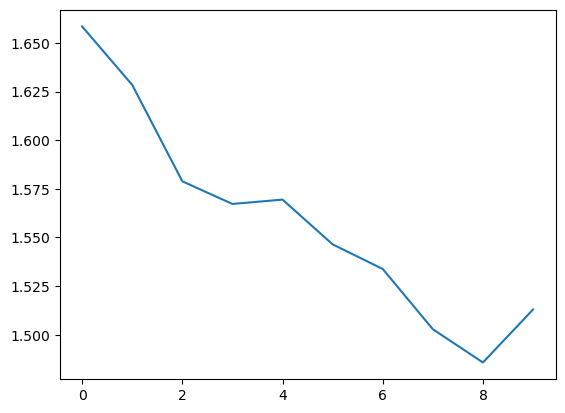

In [46]:
plt.plot(losses)

In [47]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        _, predictions = torch.max(outputs, 1)
        n_samples += len(labels)
        n_correct += (predictions == labels).sum().item()
    accuracy = n_correct / n_samples
    print(f'{(accuracy*100):.3}%')

94.0%


# What to do next

More fun things to look at

- [CNN on MNIST visualized](https://adamharley.com/nn_vis/cnn/3d.html)
- https://poloclub.github.io/cnn-explainer/
- RNN..? Maybe too complicated
- Different activation functions

# MNIST Classifier, CNN version

if time, else take home